https://librosa.org/doc/latest/effects.html

In [11]:
# Helper libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from IPython import display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa.util
import numpy as np
import glob
import os

data_dir = os.getcwd()
print(data_dir)

c:\Users\aidan_000\Desktop\UNCC\Github\ML-for-IoT\data\custom_speech_commands


In [12]:
# Set the word you want to augment
custom_word = 'imposter'

# Check if the directory for the raw audio files of the custom word already exists
if os.path.exists(os.path.join(data_dir, (custom_word +'_raw'))):
    # If it does, print an error message
    print(f'Error: The directory {os.path.join(data_dir, (custom_word + "_raw"))} already exists.')
    raw_audio_dir = os.path.join(data_dir, (custom_word + '_raw'))

else:
    print(f'Creating the directory {os.path.join(data_dir, (custom_word + "_raw"))}...')
    # Set the path for the raw audio files
    raw_audio_dir = os.path.join(data_dir, (custom_word + '_raw'))
    # Create the directory
    os.makedirs(raw_audio_dir)

# Check if the directory for the augmented audio files of the custom word already exists
if os.path.exists(os.path.join(data_dir,(custom_word + '_augmented'))):
    # If it does, print an error message
    print(f'Error: The directory {os.path.join(data_dir, (custom_word + "_augmented"))} already exists.')
    aug_audio_dir = os.path.join(data_dir, (custom_word + '_augmented'))

else:
    print(f'Creating the directory {os.path.join(data_dir, (custom_word + "_augmented"))}...')
    # Set the path for the augmented audio files
    aug_audio_dir = os.path.join(data_dir, (custom_word + '_augmented'))
    # Create the directory
    os.makedirs(aug_audio_dir)

Error: The directory c:\Users\aidan_000\Desktop\UNCC\Github\ML-for-IoT\data\custom_speech_commands\imposter_raw already exists.
Error: The directory c:\Users\aidan_000\Desktop\UNCC\Github\ML-for-IoT\data\custom_speech_commands\imposter_augmented already exists.


In [13]:
import soundfile as sf

# Get a list of all .wav files in the raw data directory
filenames = glob.glob(os.path.join(raw_audio_dir, '*.wav'))

# Initialize a counter for the number of augmented files created
num_files_created = 0

print(f'Augmenting the audio files in {raw_audio_dir}...')
print(f'Total Audio Files detected: {len(filenames)}')

for wav_file in filenames:
    # Load the audio file
    fs, wav = wavfile.read(wav_file)

    # Normalize the audio data
    wav = wav / np.max(np.abs(wav))
    one_sec_length = fs * 1  # Calculate the number of samples in one second

    # Apply time stretching to the audio (rate>1 => faster/shorter)
    wav_long = librosa.effects.time_stretch(wav, rate=0.8)
    # Apply time stretching to the audio (rate<1 => slower/longer)
    wav_short = librosa.effects.time_stretch(wav, rate=1.2)
    # Apply pitch shifting to the audio (n_steps>0 => higher pitch)
    wav_up = librosa.effects.pitch_shift(wav, sr=fs, n_steps=2, bins_per_octave=24) # 6 semitones
    # Apply pitch shifting to the audio (n_steps<0 => lower pitch)
    wav_dn = librosa.effects.pitch_shift(wav, sr=fs, n_steps=-2, bins_per_octave=24) # -3 semitones
    # Trim the silent parts of the audio
    wav_trim, idx = librosa.effects.trim(wav, top_db=40)

    # Ensure all audio clips are of the same length (1 second)
    wav_long = librosa.util.fix_length(wav_long, size=one_sec_length)
    wav_short = librosa.util.fix_length(wav_short, size=one_sec_length)
    wav_up = librosa.util.fix_length(wav_up, size=one_sec_length)
    wav_dn = librosa.util.fix_length(wav_dn, size=one_sec_length)
    wav_trim = librosa.util.fix_length(wav_trim, size=one_sec_length)

    # Get the base filename (without the directory)
    base_filename = os.path.basename(wav_file)

    # Save the augmented audio files to the new data directory, commented out to avoid overwriting
    wavfile.write(os.path.join(aug_audio_dir, os.path.splitext(base_filename)[0] + '_long.wav'), fs, wav_long)
    wavfile.write(os.path.join(aug_audio_dir, os.path.splitext(base_filename)[0] + '_short.wav'), fs, wav_short)
    wavfile.write(os.path.join(aug_audio_dir, os.path.splitext(base_filename)[0] + '_up.wav'), fs, wav_up)
    wavfile.write(os.path.join(aug_audio_dir, os.path.splitext(base_filename)[0] + '_down.wav'), fs, wav_dn)
    wavfile.write(os.path.join(aug_audio_dir, os.path.splitext(base_filename)[0] + '_trim.wav'), fs, wav_trim)
    sf.write(os.path.join(aug_audio_dir, os.path.splitext(base_filename)[0] + '_long2.wav'), wav_long, fs, subtype='PCM_16')
    sf.write(os.path.join(aug_audio_dir, os.path.splitext(base_filename)[0] + '_short2.wav'), wav_short, fs, subtype='PCM_16')
    sf.write(os.path.join(aug_audio_dir, os.path.splitext(base_filename)[0] + '_up2.wav'), wav_up, fs, subtype='PCM_16')
    sf.write(os.path.join(aug_audio_dir, os.path.splitext(base_filename)[0] + '_down2.wav'), wav_dn, fs, subtype='PCM_16')
    sf.write(os.path.join(aug_audio_dir, os.path.splitext(base_filename)[0] + '_trim2.wav'), wav_trim, fs, subtype='PCM_16')
    num_files_created += 5

print(f'Created {num_files_created} augmented audio files in {aug_audio_dir}.')

Augmenting the audio files in c:\Users\aidan_000\Desktop\UNCC\Github\ML-for-IoT\data\custom_speech_commands\imposter_raw...
Total Audio Files detected: 100


C:\Users\aidan_000\AppData\Local\Temp\ipykernel_17876\2445244712.py:14: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, wav = wavfile.read(wav_file)


Created 500 augmented audio files in c:\Users\aidan_000\Desktop\UNCC\Github\ML-for-IoT\data\custom_speech_commands\imposter_augmented.


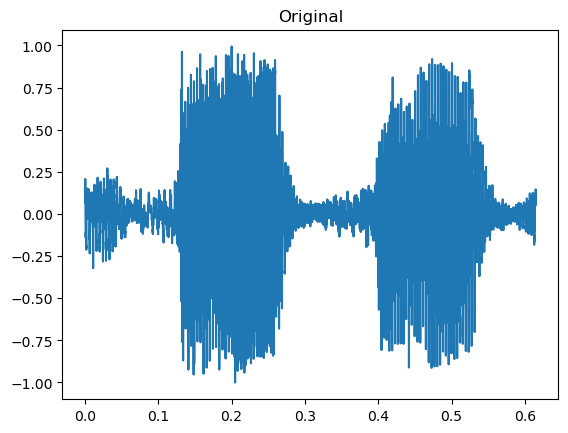

In [14]:
plt.plot(np.arange(len(wav))/fs, wav)
plt.title('Original')
ipd.Audio(wav, rate=fs)

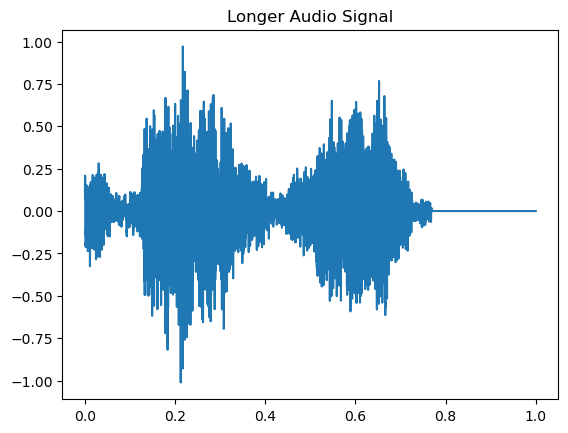

In [15]:
plt.plot(np.arange(len(wav_long))/fs, wav_long)
plt.title('Longer Audio Signal')
ipd.Audio(wav_long, rate=fs)

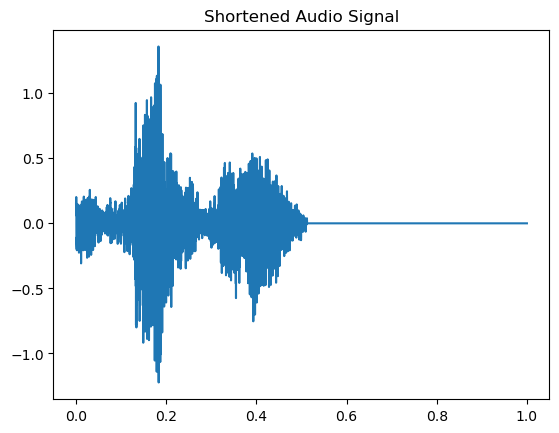

In [16]:
plt.plot(np.arange(len(wav_short))/fs, wav_short)
plt.title('Shortened Audio Signal')
ipd.Audio(wav_short, rate=fs)

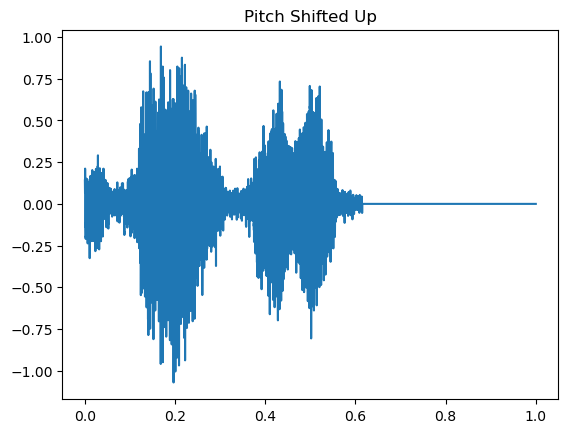

In [17]:
plt.plot(np.arange(len(wav_up))/fs, wav_up)
plt.title('Pitch Shifted Up')
ipd.Audio(wav_up, rate=fs)

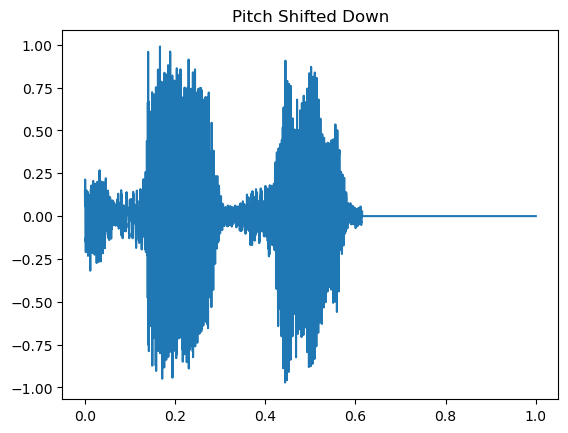

In [18]:
plt.plot(np.arange(len(wav_dn))/fs, wav_dn)
plt.title('Pitch Shifted Down')
ipd.Audio(wav_dn, rate=fs)

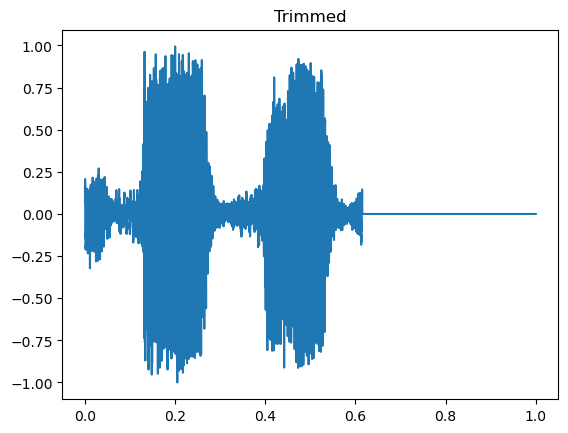

In [19]:
plt.plot(np.arange(len(wav_trim))/fs, wav_trim)
plt.title('Trimmed')
ipd.Audio(wav_trim, rate=fs)

In [20]:
data_dir = aug_audio_dir
filenames = tf.io.gfile.glob(str(data_dir) + '/*.wav')

In [21]:
num_files=len(filenames)
num_files
print("Total files:", num_files)

Total files: 1000


In [22]:
#randomizes order of samples for validation list
random_list = list(range(0, num_files)) #create array [1,2,3...]
random.shuffle(random_list) #randomize the array

In [23]:
# #will write to file in form: keyword_folder/audio_sample
# from pathlib import Path
# add_val_num = 200

# selected_filenames = random.sample(filenames, add_val_num)

# file_name = 'validation_list.txt'
# import os

# # Add selected filenames to validation text file
# with open(os.path.join(data_dir, file_name), 'w') as file:
#     for filename in selected_filenames:
#         file.write(filename + '\n')

# print(f'Added {add_val_num} files to {file_name} in {data_dir}.')


In [24]:
# #randomizes order of samples for validation list
# random_list = list(range(0, num_files)) #create array [1,2,3...]
# random.shuffle(random_list) #randomize the array

In [25]:
# #will write to file in form: keyword_folder/audio_sample
# from pathlib import Path
# add_val_num = 200

# selected_filenames = random.sample(filenames, add_val_num)

# file_name = 'test_list.txt'
# import os

# # Add selected filenames to validation text file
# with open(os.path.join(data_dir, file_name), 'w') as file:
#     for filename in selected_filenames:
#         file.write(filename + '\n')

# print(f'Added {add_val_num} files to {file_name} in {data_dir}.')
